In [6]:
import random
from pprint import pprint
import time
import numpy as np
import matplotlib.pyplot as plt

In [44]:


# Parâmetros do AG
POPULATION_SIZE = 20
MUTATION_RATE = 0.03
CROSSING_RATE = 0.8
MAX_GENERATIONS = 1000

# Gera um board state aleatório
def generate_board_state():
    board_state = [format(random.randint(0, 7), '03b') for _ in range(8)]
    return board_state

# Calcula o fitness do board_state
def calculate_fitness(board_state):
    conflicts = 0
    for i in range(8):
        for j in range(i + 1, 8):
            # Para identificar conflitos nas diagonais:
            # a diferença entre as linhas é igual a diferença entre as colunas
            # E pra identificar conflitos na horizontal: 
            # verifica se os valores dos board_states sao iguais (indica que estão na mesma linha)
            if int(board_state[i], 2) == int(board_state[j], 2) or abs(int(board_state[i], 2) - int(board_state[j], 2)) == j - i:
                conflicts += 1
    return 28 - conflicts  # fitness máximo = 28 (sem conflitos)

# Seleciona os pais para o crossover usando a estratégia da roleta
def roullete_selection(population):
    total_fitness = sum(individual[1] for individual in population)
    pick = random.uniform(0, total_fitness)
    current = 0
    for individual in population:
        current += individual[1]
        if(current >= pick):
            return individual

# Operação de crossover (estratégia do ponto de corte)
def crossover(parent1, parent2):
    crossover_point = random.randint(1, 7)
    child = parent1[:crossover_point] + parent2[crossover_point:]
    return child

# Operação de mutação (estratégia do bit flip)
def mutate(board_state):
    pos = random.randint(0, 7) # posicao aleatoria do tabuleiro para fazer o flip
    bit_to_flip = random.randint(0,2) # escolhe um dos 3 bits para flipar
    flipped_bit = '1' if board_state[pos][bit_to_flip] == '0' else '0'
    new_bin_pos = board_state[pos][:bit_to_flip] + flipped_bit + board_state[pos][bit_to_flip+1:]
    board_state[pos] = new_bin_pos
    return board_state

############################# Execução ################################
def algoritmoGenetico():
    # Gera população inicial
    # print("Gera população inicial\n")
    population = [(generate_board_state(), 0) for _ in range(POPULATION_SIZE)]
    # Loop principal do AG
    for generation in range(MAX_GENERATIONS):
        # Calcula fitness para cada board_state
        population = [(board_state, calculate_fitness(board_state)) for board_state, _ in population]
        # Verifica se a solução foi encontrada
        best_board_state = max(population, key=lambda x: x[1])[0]
    
        if calculate_fitness(best_board_state) == 28:
            print("\033[1;32mSolução encontrada na geração:", generation, "\033[0;39m")
            return best_board_state,generation+1,True

        # print(f"\033[1;32mMelhor Fitness geração {generation} = {calculate_fitness(best_board_state)}\033[0;39m")

        # Cria próxima geração
        new_population = []

        # print(f"Seleção Elitista de sobrevivente - Geração {generation}")
        # Elitista: Mantém o melhor board_state da geração
        new_population.append(max(population, key=lambda x: x[1]))

        # Executa seleção, crossover e mutação
        # print(f"Gera nova população")
        while len(new_population) < POPULATION_SIZE:
            # print(f"Seleção dos Pais - Roleta")

            parent1 = roullete_selection(population)
            parent2 = roullete_selection(population)
            if random.random() <= CROSSING_RATE:
                # print(f"Crossover - Ponto de corte")
                child = crossover(parent1[0], parent2[0])
                if random.random() <= MUTATION_RATE:
                    # print(f"Mutação - Bit flip")
                    child = mutate(child)
                new_population.append((child, 0))
            else:
                new_population.append(parent1)
                new_population.append(parent2)

        # Atualiza a população
        population = new_population
    return best_board_state,generation+1,False


# Execução

In [45]:
best_board_state,generation,isBestSolution= algoritmoGenetico()
# Printa a melhor solução
print("Melhor Solução (codificação binária): ", best_board_state)
boardStateInt = [int(binary,2) for binary in best_board_state]
print("Melhor Solução (codificação inteira): ", boardStateInt)
print("fitness: ", calculate_fitness(best_board_state))
print(f"Número de iterações (gerações): {generation}")
print(f"É solução melhor global? {isBestSolution}")

Melhor Solução (codificação binária):  ['101', '011', '101', '000', '010', '100', '110', '001']
Melhor Solução (codificação inteira):  [5, 3, 5, 0, 2, 4, 6, 1]
fitness:  27
Número de iterações (gerações): 1000
É solução melhor global? False


#### Execute o algoritmo 50 vezes e calcule: média e desvio padrão do número mínimo de iterações necessário para parar o algoritmo; média e desvio padrão do tempo de execução do algoritmo.

In [16]:
# Listas 
iterationsList = []
time_execList = []
bestsList = []

# Executar o algoritmo 50 vezes
for _ in range(50):
    
    start = time.perf_counter()  # Início da contagem do tempo
    
    ##execução 
    best_board_state,generation,isBestSolution= algoritmoGenetico()
    end = time.perf_counter()  # Fim da contagem do tempo

    if isBestSolution:
        bestsList.append(best_board_state)
    # Calcula o tempo de execução e armazena os resultados
    tExec= end - start
    iterationsList.append(generation)
    time_execList.append(tExec)

# Cálculo da média e desvio padrão
media_iteracoes = np.mean(iterationsList)
desvio_padrao_iteracoes = np.std(iterationsList)

media_tempo = np.mean(time_execList)
desvio_padrao_tempo = np.std(time_execList)

# Exibir resultados
print(f"Média de iterações: {media_iteracoes}")
print(f"Desvio padrão de iterações: {desvio_padrao_iteracoes}")
print(f"Média de tempo de execução: {media_tempo} segundos")
print(f"Desvio padrão de tempo de execução: {desvio_padrao_tempo} segundos")


print(f"\n-=-=-=Melhores soluções-=-=-=-")
if len(bestsList) > 0:
    for i,solution in enumerate(bestsList):
        print("Melhor Solução (codificação binária): ", best_board_state)
        boardStateInt = [int(binary,2) for binary in best_board_state]
        print("Melhor Solução (codificação inteira): ", boardStateInt)
        print("fitness: ", calculate_fitness(best_board_state))
        print(f"É solução melhor global? {isBestSolution}")


Solução encontrada na geração: 445 
Solução encontrada na geração: 546 
Solução encontrada na geração: 765 
Média de iterações: 975.12
Desvio padrão de iterações: 103.77044665992335
Média de tempo de execução: 0.6712774780020118 segundos
Desvio padrão de tempo de execução: 0.2855365137133994 segundos

-=-=-=Melhores soluções-=-=-=-
Melhor Solução (codificação binária):  ['001', '011', '000', '111', '111', '010', '110', '110']
Melhor Solução (codificação inteira):  [1, 3, 0, 7, 7, 2, 6, 6]
fitness:  26
É solução melhor global? False
Melhor Solução (codificação binária):  ['001', '011', '000', '111', '111', '010', '110', '110']
Melhor Solução (codificação inteira):  [1, 3, 0, 7, 7, 2, 6, 6]
fitness:  26
É solução melhor global? False
Melhor Solução (codificação binária):  ['001', '011', '000', '111', '111', '010', '110', '110']
Melhor Solução (codificação inteira):  [1, 3, 0, 7, 7, 2, 6, 6]
fitness:  26
É solução melhor global? False


## Gráfico

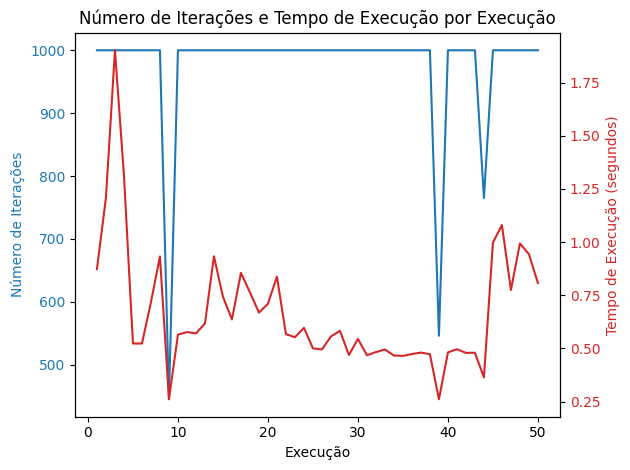

In [17]:
# Gráfico mostrando número de iterações por execução e tempo de execução

executions = np.arange(1, 51)  # Eixo x, de 1 a 50

fig, ax1 = plt.subplots()

# Gráfico de número de iterações (à esquerda)
ax1.set_xlabel('Execução')
ax1.set_ylabel('Número de Iterações', color='tab:blue')
ax1.plot(executions, iterationsList, color='tab:blue', label='Iterações')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Criar um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()
ax2.set_ylabel('Tempo de Execução (segundos)', color='tab:red')
ax2.plot(executions, time_execList , color='tab:red', label='Tempo de Execução')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Título do gráfico
plt.title('Número de Iterações e Tempo de Execução por Execução')

# Exibir gráfico
fig.tight_layout()  # Para ajustar bem o layout
plt.show()

## Código alterado pra armazenar os 5 melhores resultados

In [15]:
# Listas 
iterationsList = []
time_execList = []
bestsList = []

# Executar o algoritmo 50 vezes
while len(bestsList)<5:
    
    start = time.perf_counter()  # Início da contagem do tempo
    
    ##execução 
    best_board_state,generation,isBestSolution= algoritmoGenetico()
    end = time.perf_counter()  # Fim da contagem do tempo

    if isBestSolution:
        bestsList.append(best_board_state)
    # Calcula o tempo de execução e armazena os resultados
    tExec= end - start
    iterationsList.append(generation)
    time_execList.append(tExec)

# Cálculo da média e desvio padrão
media_iteracoes = np.mean(iterationsList)
desvio_padrao_iteracoes = np.std(iterationsList)

media_tempo = np.mean(time_execList)
desvio_padrao_tempo = np.std(time_execList)

# Exibir resultados
print(f"Média de iterações: {media_iteracoes}")
print(f"Desvio padrão de iterações: {desvio_padrao_iteracoes}")
print(f"Média de tempo de execução: {media_tempo} segundos")
print(f"Desvio padrão de tempo de execução: {desvio_padrao_tempo} segundos")


print(f"\n-=-=-= 5 melhores soluções-=-=-=-")
if len(bestsList) > 0:
    for i,solution in enumerate(bestsList):
        print(f"\n{i+1}°: \n")
        print("Melhor Solução (codificação binária): ", best_board_state)
        boardStateInt = [int(binary,2) for binary in best_board_state]
        print("Melhor Solução (codificação inteira): ", boardStateInt)
        print("fitness: ", calculate_fitness(best_board_state))
        print(f"É solução melhor global? {isBestSolution}")

Solução encontrada na geração: 857 
Solução encontrada na geração: 222 
Solução encontrada na geração: 175 
Solução encontrada na geração: 430 
Solução encontrada na geração: 37 
Média de iterações: 936.9423076923077
Desvio padrão de iterações: 212.6689747599395
Média de tempo de execução: 0.5892459269279453 segundos
Desvio padrão de tempo de execução: 0.21826448304865215 segundos

-=-=-= 5 melhores soluções-=-=-=-

1°: 

Melhor Solução (codificação binária):  ['010', '101', '001', '110', '000', '011', '111', '100']
Melhor Solução (codificação inteira):  [2, 5, 1, 6, 0, 3, 7, 4]
fitness:  28
É solução melhor global? True

2°: 

Melhor Solução (codificação binária):  ['010', '101', '001', '110', '000', '011', '111', '100']
Melhor Solução (codificação inteira):  [2, 5, 1, 6, 0, 3, 7, 4]
fitness:  28
É solução melhor global? True

3°: 

Melhor Solução (codificação binária):  ['010', '101', '001', '110', '000', '011', '111', '100']
Melhor Solução (codificação inteira):  [2, 5, 1, 6, 0, 3, 